In [1]:
import os
os.chdir("..")

In [2]:
%pwd


'c:\\Users\\ali\\Desktop\\brain_tumor_detection'

In [38]:
from PIL import Image, ImageDraw

image_name ="volume_1_slice_40_jpg.rf.12b3bdc0f41491ead8d181df617b3aa8"
image_path = f"data/train/images/{image_name}.jpg"

img = Image.open(image_path)

In [39]:
label_path = f"data/train/labels/{image_name}.txt"

with open(label_path, 'r') as f:
    lines = f.readlines()

label = lines[0]

In [40]:
label_index, x_center, y_center, width, height = label.split()
x_center = float(x_center)
y_center = float(y_center)
width = float(width)
height = float(height)

x = x_center - width / 2
y = y_center - height / 2

x, y, width, height

(0.36666666666666664, 0.29166666666666663, 0.15, 0.11666666666666667)

In [41]:
img = Image.open(image_path)
img_width, img_height = img.size

x = x * img_width
y = y * img_height
width = width * img_width
height = height * img_height

x, y, width, height


(88.0, 69.99999999999999, 36.0, 28.0)

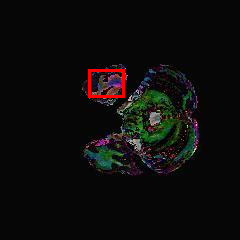

In [42]:
bbox = [x, y, x + width, y + height]
img = Image.open(image_path)

draw = ImageDraw.Draw(img)
draw.rectangle(bbox, outline='red', width=3)
img

In [23]:
from ultralytics import YOLO

# Load a pretrained YOLO11n model
model = YOLO("yolo11n.pt")

# Run inference on an image
results = model("https://ultralytics.com/images/bus.jpg")  # results list

boxes = results[0].boxes
class_names = model.names

# Dictionary to store boxes per class
class_boxes = {}

for box in boxes:
    cls_id = int(box.cls[0])
    cls_name = class_names[cls_id]
    xywh = box.xywh[0].tolist()

    if cls_name not in class_boxes:
        class_boxes[cls_name] = []
    class_boxes[cls_name].append(xywh)
    
class_boxes


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 c:\Users\ali\Desktop\brain_tumor_detection\notebooks\bus.jpg: 640x480 4 persons, 1 bus, 106.7ms
Speed: 4.1ms preprocess, 106.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


{'bus': [[400.01361083984375,
   478.8882141113281,
   792.36181640625,
   499.04803466796875]],
 'person': [[740.4134521484375,
   636.7728271484375,
   138.79254150390625,
   483.8793029785156],
  [143.35269165039062, 651.8800659179688, 191.89593505859375, 504.6298828125],
  [283.7633056640625,
   634.562255859375,
   121.40863037109375,
   451.74713134765625],
  [34.45360565185547, 714.2138671875, 68.86373901367188, 316.2906494140625]]}

In [22]:
results[0].names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou